In [4]:
import tellurium as te
import urllib2
%matplotlib inline

# Roadrunner Methoden

## Antimony Modell aus Modell-Datenbank abfragen:
Lade mithilfe von urllib2 das Antimony-Modell des "Repressilator" herunter. Benutze dazu die urllib2 Methoden urlopen() und read()

Die URL für den Repressilator lautet:
http://antimony.sourceforge.net/examples/biomodels/BIOMD0000000012.txt

*Elowitz, M. B., & Leibler, S. (2000). A synthetic oscillatory network of transcriptional regulators. Nature, 403(6767), 335-338.*

In [5]:
Repressilator = urllib2.urlopen('http://antimony.sourceforge.net/examples/biomodels/BIOMD0000000012.txt').read()

Erstelle eine Instanz von roadrunner, indem du gleichzeitig den Repressilator als Modell lädst. Benutze dazu loada() von tellurium.

In [6]:
rr = te.loada(Repressilator)

Im folgenden Teil wollen wir einige der Methoden von telluriums roadrunner ausprobieren.
Lass dir dazu das Modell als Antimony oder SBML anzeigen. Dies erreichst du mit getAntimony() oder getSBML().

In [7]:
print rr.getAntimony()

// Created by libAntimony v2.9.4
model *BIOMD0000000012()

  // Compartments and Species:
  compartment cell;
  substanceOnly species PX in cell, PY in cell, PZ in cell, X in cell, Y in cell;
  substanceOnly species Z in cell;

  // Assignment Rules:
  beta := tau_mRNA/tau_prot;
  alpha0 := a0_tr*eff*tau_prot/(ln(2)*KM);
  a0_tr := ps_0*60;
  alpha := a_tr*eff*tau_prot/(ln(2)*KM);
  a_tr := (ps_a - ps_0)*60;
  t_ave := tau_mRNA/ln(2);
  kd_mRNA := ln(2)/tau_mRNA;
  kd_prot := ln(2)/tau_prot;
  k_tl := eff/t_ave;

  // Reactions:
  Reaction1: X => ; kd_mRNA*X;
  Reaction2: Y => ; kd_mRNA*Y;
  Reaction3: Z => ; kd_mRNA*Z;
  Reaction4:  => PX; k_tl*X;
  Reaction5:  => PY; k_tl*Y;
  Reaction6:  => PZ; k_tl*Z;
  Reaction7: PX => ; kd_prot*PX;
  Reaction8: PY => ; kd_prot*PY;
  Reaction9: PZ => ; kd_prot*PZ;
  Reaction10:  => X; a0_tr + a_tr*KM^n/(KM^n + PZ^n);
  Reaction11:  => Y; a0_tr + a_tr*KM^n/(KM^n + PX^n);
  Reaction12:  => Z; a0_tr + a_tr*KM^n/(KM^n + PY^n);

  // Species initializa

In [ ]:
print rr.getSBML()

## Solver Methoden

Achtung: Obwohl resetToOrigin() das Modell in den ursprünglichen Zustand zurück setzt, bleiben Solver-spezifische Einstellungen erhalten. Daher benutze am besten immer te.loada() als vollständigen Reset!

Mit getIntegrator() ist es möglich, den Solver und dessen gesetzte Einstellungen anzeigen zu lassen.

In [7]:
rr = te.loada(Repressilator)
print rr.getIntegrator()

< roadrunner.Integrator() >
  name: cvode
  settings:
      relative_tolerance: 0.000001
      absolute_tolerance: 0.000000000001
                   stiff: true
       maximum_bdf_order: 5
     maximum_adams_order: 12
       maximum_num_steps: 20000
       maximum_time_step: 0
       minimum_time_step: 0
       initial_time_step: 0
          multiple_steps: false
      variable_step_size: false



Ändere den verwendeten Solver von 'CVODE' auf Runge-Kutta 'rk45' und lass dir die Settings nochmals anzeigen.
Verwende dazu setIntegrator() und getIntegrator().
Was fällt auf?

In [8]:
rr = te.loada(Repressilator)
rr.setIntegrator('rk45')
print rr.getIntegrator()

< roadrunner.Integrator() >
  name: rk45
  settings:
      variable_step_size: true
       minimum_time_step: 0.000000000001
       maximum_time_step: 1
                 epsilon: 0.000000000001



Simuliere den Repressilator von 0s bis 1000s und plotte die Ergebnisse für verschiedene steps-Werte (z.b. steps = 10 oder 10000) in der simulate-Methode. Was macht das Argument steps?

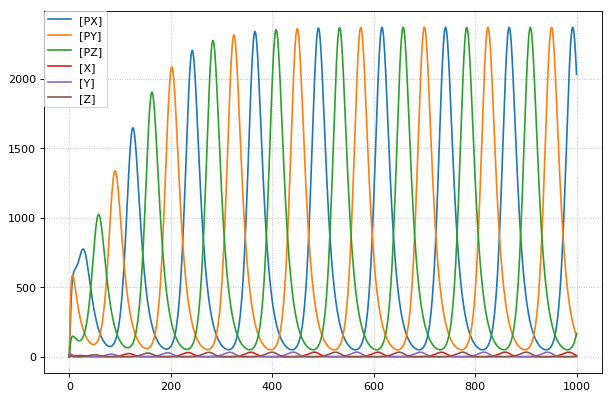

In [9]:
rr = te.loada(Repressilator)
rr.simulate(0,1000,1000)
rr.plot()

Benutze weiterhin 'CVODE' und verändere den Paramter 'relative_tolerance' des Solvers (z.b. 1 oder 10).
Verwendete dabei steps = 10000 in simulate(). 
Was fällt auf?

Hinweis - die nötige Methode lautet roadrunner.getIntegrator().setValue().

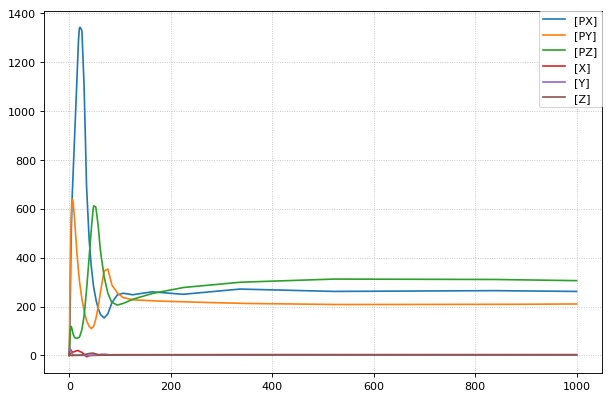

In [10]:
rr = te.loada(Repressilator)
rr.getIntegrator().setValue('relative_tolerance',0.0000001)
rr.getIntegrator().setValue('relative_tolerance',1)
rr.simulate(0,1000,1000)
rr.plot()

# ODE-Modell als Objekt in Python

Oben haben wir gesehen, dass tellurium eine Instanz von RoadRunner erzeugt, wenn ein Modell eingelesen wird.

Außerdem ist der Zugriff auf das eigentliche Modell möglich. Unter Verwendung von .model gibt es zusätzliche Methoden um das eigentliche Modell zu manipulieren: 

In [11]:
rr = te.loada(Repressilator)
print type(rr)
print type(rr.model)

<class 'tellurium.roadrunner.extended_roadrunner.ExtendedRoadRunner'>
<class 'roadrunner.roadrunner.ExecutableModel'>


## Aufgabe 1 - Parameterscan:

A) Sieh dir die Implementierung des Modells 'Repressilator' an, welche Paramter gibt es?

B) Erstelle einen Parameterscan, welcher den Wert des Paramters mit der Bezeichnung 'n' im Repressilator ändert.
(Beispielsweise für n=1,n=2,n=3,...)

Lasse das Modell für jedes gewählte 'n' simulieren.

    Beantworte dazu folgende Fragen:

    a) Welchen Zweck erfüllt 'n' im Modell im Hinblick auf die Reaktion, in der 'n' auftaucht?
    b) Im Gegensatz dazu, welchen Effekt hat 'n' auf das Modellverhalten?
    c) Kannst du einen Wert für 'n' angeben, bei dem sich das Verhalten des Modells qualitativ ändert?

C) Visualisiere die Simulationen. Welche Art von Plot ist günstig, um die Modellsimulation darzustellen? Es gibt mehrere geeignete Varianten, aber beschränke die Anzahl der Graphen im Plot(z.b. wähle eine Spezies und plotte).

Hinweise:

Nutze die "Autovervollständigung" des Python-Notebook und außerdem die offizielle Dokumentation von RoadRunner, um die  Methoden zu finden, die für die Implementierung eines Parameterscans notwendig sind. Natürlich kannst du auch das Notebook von der Tellurium Einführung als Hilfe benutzen.

Ziehe in Erwägung, dass das Modell einen oder mehrere Resets benötigt. Überlege, an welcher Stelle deiner implementierung und welche Reset-Methode du idealerweise einsetzen solltest.

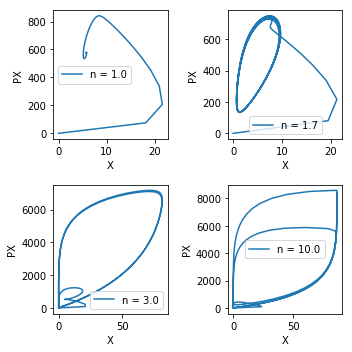

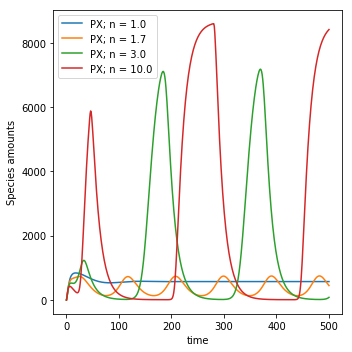

In [13]:
import matplotlib.pyplot as plt
import numpy as np

fig_phase = plt.figure(figsize=(5,5))

rr = te.loada(Repressilator)
for l,i in enumerate([1.0,1.7,3.0,10.]):
    
    fig_phase.add_subplot(2,2,l+1)
    
    rr.n = i
    rr.reset()
    result = rr.simulate(0,500,500,selections=['time','X','PX'])

    plt.plot(result['X'],result['PX'],label='n = %s' %i)
    
    plt.xlabel('X')
    plt.ylabel('PX')
    plt.legend() 

plt.tight_layout()

fig_timecourse= plt.figure(figsize=(5,5))

rr = te.loada(Repressilator)
for l,i in enumerate([1.0,1.7,3.0,10.]):
    
    rr.n = i
    rr.reset()
    result = rr.simulate(0,500,500,selections=['time','X','PX'])

    plt.plot(result['time'],result['PX'],label='PX; n = %s' %i)
    
    plt.xlabel('time')
    plt.ylabel('Species amounts')
    plt.legend() 
    
    
    
plt.tight_layout()

## Aufgabe 2 - (Initial value)-scan:

Erstelle einen "Scan", der den Anfwangswert von der Spezies Y ändert.
Das Modellverhalten ist hierbei weniger interessant.
Achte vielmehr darauf, die Resets so zu setzen, dass 'Y' bei der Simulation tatsächlich beim gesetzten Wert startet.

['init(PX)', 'init(PY)', 'init(PZ)', 'init(X)', 'init(Y)', 'init(Z)']
[  0.   0.   0.   0.  20.   0.]


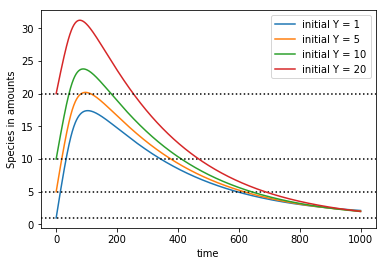

In [26]:
import matplotlib.pyplot as plt
import numpy as np

rr = te.loada(Repressilator)
print rr.model.getFloatingSpeciesInitAmountIds()
print rr.model.getFloatingSpeciesInitAmounts()

for l,i in enumerate([1,5,10,20]):
    
    # Auswahl einiger Varianten (es gibt noch mehr Möglichkeiten...)
    #Variante1 - Falsch   
    #rr.Y=i

    #Variante2 - Falsch
    #rr.Y=i
    #rr.reset()
    
    #Variante3 - Richtig
    rr.model["init(Y)"] = i
    rr.reset()    
    
   
    result = rr.simulate(0,10,1000,selections=['Y','PY'])
    
    #plt.plot(result[:,0],result['PY'],label='n = %s' %i)
    plt.plot(result['Y'],label='initial Y = %s' %i)
    plt.xlabel('time')
    plt.ylabel('Species in amounts')
    plt.axhline(y=i,linestyle = ':',color='black')
    plt.legend()
    